Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


Step 2: Load MNIST Data

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Step 3: Build the Neural Network Model

In [3]:
# Define the model
model = models.Sequential()

# Input layer (784 neurons) and hidden layer (128 neurons with ReLU activation)
model.add(layers.Dense(128, input_shape=(784,), activation='relu'))

# Output layer (10 neurons with softmax activation)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and an optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Train the Model

In [4]:
# Train the model for 10 epochs
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8645 - loss: 0.4782 - val_accuracy: 0.9563 - val_loss: 0.1557
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9599 - loss: 0.1366 - val_accuracy: 0.9671 - val_loss: 0.1135
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9743 - loss: 0.0898 - val_accuracy: 0.9723 - val_loss: 0.0947
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9807 - loss: 0.0666 - val_accuracy: 0.9728 - val_loss: 0.0960
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9863 - loss: 0.0484 - val_accuracy: 0.9780 - val_loss: 0.0814
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9892 - loss: 0.0378 - val_accuracy: 0.9759 - val_loss: 0.0857
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9924 - loss: 0.0265 - val_accuracy: 0.9734 - val_loss: 0.0909
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9933 - loss: 0.0226

Step 5: Analyze the Gradient Flow (Backpropagation)

5.1. Compute Gradients Manually



In [5]:
# Create a TensorFlow GradientTape context for manual gradient computation
with tf.GradientTape() as tape:
    # Forward pass: Get the predictions
    predictions = model(x_train_flat[:1])  # Test with a small batch (e.g., 1 sample)

    # Compute the loss
    loss = tf.keras.losses.categorical_crossentropy(y_train_onehot[:1], predictions)

# Backward pass: Compute the gradients of the loss with respect to model weights
gradients = tape.gradient(loss, model.trainable_variables)

# Print the gradients to analyze
for i, grad in enumerate(gradients):
    print(f"Gradient for layer {i+1}: {grad.numpy()}")


Gradient for layer 1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Gradient for layer 2: [ 0.          0.16406153 -0.         -0.         -0.01598882 -0.
 -0.11705118  0.         -0.         -0.         -0.1408182  -0.
  0.01919029  0.10278717  0.01074088  0.02035784 -0.00220725  0.
  0.00342773 -0.02747392 -0.11854874  0.04260874 -0.          0.
  0.          0.          0.         -0.         -0.08768821 -0.06638769
  0.21008049 -0.         -0.          0.06230589  0.10295144 -0.07219239
 -0.19312455  0.         -0.         -0.         -0.         -0.03537066
  0.03511482  0.12783903 -0.         -0.         -0.02349391 -0.
  0.         -0.00280785  0.         -0.          0.01248588  0.09646241
  0.02488497 -0.06687873 -0.         -0.00921072  0.         -0.
  0.          0.07809762  0.          0.          0.         -0.
 -0.04440385  0.21165872  0.         -0.13416013 -0.0

5.2. Check for Vanishing/Exploding Gradients


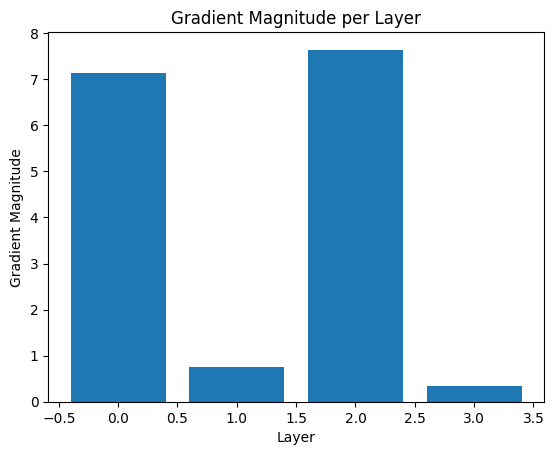

In [6]:
# Plot the gradient magnitudes for each layer
grad_magnitudes = [np.linalg.norm(grad.numpy()) for grad in gradients]

plt.bar(range(len(grad_magnitudes)), grad_magnitudes)
plt.xlabel('Layer')
plt.ylabel('Gradient Magnitude')
plt.title('Gradient Magnitude per Layer')
plt.show()


Step 6: Modify the Model to Fix the Issue


In [7]:
# Modify the model with LeakyReLU and BatchNormalization
model = models.Sequential()

model.add(layers.Dense(128, input_shape=(784,)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Retrain the model
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8685 - loss: 0.4361 - val_accuracy: 0.9433 - val_loss: 0.1969
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9395 - loss: 0.2040 - val_accuracy: 0.9544 - val_loss: 0.1590
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - loss: 0.1504 - val_accuracy: 0.9592 - val_loss: 0.1407
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9630 - loss: 0.1252 - val_accuracy: 0.9646 - val_loss: 0.1195
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9672 - loss: 0.1111 - val_accuracy: 0.9557 - val_loss: 0.1481
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9724 - loss: 0.0909 - val_accuracy: 0.9683 - val_loss: 0.1061
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9750 - loss: 0.0801 - val_accuracy: 0.9686 - val_loss: 0.1050
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9769 - loss: 0.0723 

Step 7: Observe Training and Loss Curves


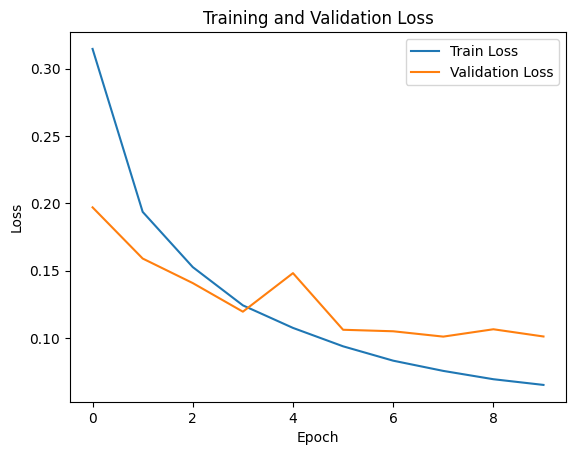

In [8]:
# Plot training & validation accuracy and loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


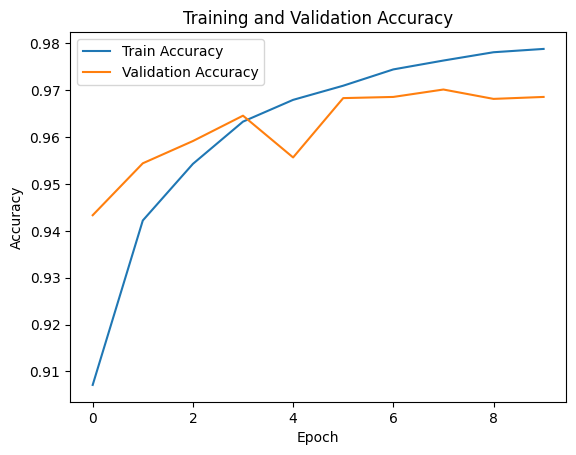

In [9]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
